# Heuristic CNN-based Policy

The new heuristic Policy combines two Convolutional models:

- Hard Policy: a model that reliably identifies critical MUST-move patterns
- Soft Policy: a model that prefers fields that are strongly connected (via common lines) with other stones

In [123]:
import numpy as np

from domoku.analyzers import Analyzer
from domoku.data import create_nxnx4
from domoku.policies.softadvice import MaxInfluencePolicyParams, MaxInfluencePolicy
from domoku.tools import GomokuTools as gt
from domoku.board import GomokuBoard

from domoku.policies.maximal_criticality import MaxCriticalityPolicy

In [124]:
def print_bin(binary_sample):
    binary_sample = np.squeeze(binary_sample)
    print(f'shape: {binary_sample.shape}')
    print(np.rollaxis(binary_sample, 2, 0)[0])
    print()
    print(np.rollaxis(binary_sample, 2, 0)[1])

def vis(tensor, scale=99):
    npa = np.squeeze(tensor[0,:,:,0].numpy())
    print((npa*scale).astype(int))

In [127]:
SIZE=15

# Combine Soft Advice with Criticality Comprehension

In [128]:
examine = 'g5g9h7i7i8j5g7h8'

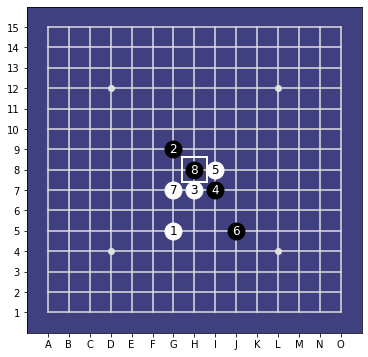

In [129]:
stones = gt.string_to_stones(examine)
board = GomokuBoard(n=SIZE, disp_width=6, stones=stones)
board.display()

In [130]:
sample = create_nxnx4(SIZE, stones)
#print_bin(sample)

In [131]:
detect5 = Analyzer(n=15)
hard_policy = MaxCriticalityPolicy(SIZE)
params = MaxInfluencePolicyParams(
    n=15,
    sigma=.8,
    iota=8,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
soft_policy = MaxInfluencePolicy(params, criticality_model=hard_policy)

/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [132]:
vis(soft_policy(sample), scale=10)

[[  1   0   2   1   2   1   2   1   2   1   2   0   1   0   0]
 [  0   3   2   4   3   6   3   6   2   4   1   2   0   0   1]
 [  1   1   6   5   9   7  10   6   9   3   5   0   1   2   0]
 [  0   2   3  11  10  17  12  17   7   9   1   3   3   1   0]
 [  0   0   4   7  19  17  24  16  16   4   5   4   2   0   1]
 [  1   0   2   7  11 525  18  23   8  10   7   4   1   4   1]
 [  2   5   3   7   5   5   0   7  13   7   9   3   8   4   4]
 [  3   6  14  14  26  15  17   0   0  14   9  15   8   9   3]
 [  3   9  16  33  41  61   0   0   0  14  28  18  17   8   5]
 [  4   9  22  40  68  74  80  33   5 529  29  30  17  11   4]
 [  4  11  22  43  63  86   0  47   4   0  39  28  20  10   6]
 [  5  11  23  39  61  65  61  30  10  22  28  29  18  11   5]
 [  5  11  21  34  39  47  38  25   3  12  20  18  16   9   4]
 [  4  10  17  21  24  25  20  12   2   6   9  11  10   8   4]
 [  3   7  10  12  13  11   7   4   1   1   4   5   5   5   3]]


In [134]:
move = soft_policy.draw(sample)
move

('J', 6)

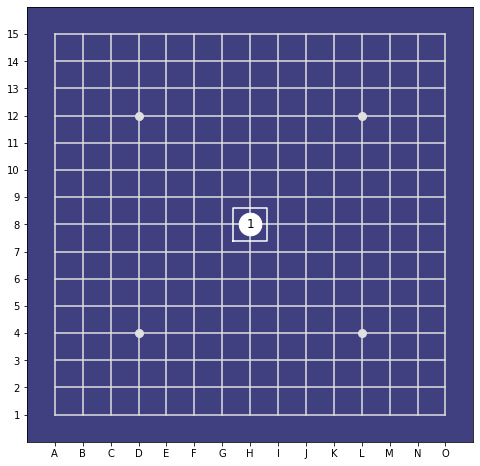

In [135]:
examine='H8'
stones = gt.string_to_stones(examine)
board = GomokuBoard(n=15, disp_width=8, stones=stones)
board.display()

In [136]:
params = MaxInfluencePolicyParams(
    n=15,
    sigma=.2,
    iota=15,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
soft_policy = MaxInfluencePolicy(params, criticality_model=hard_policy)

DONE


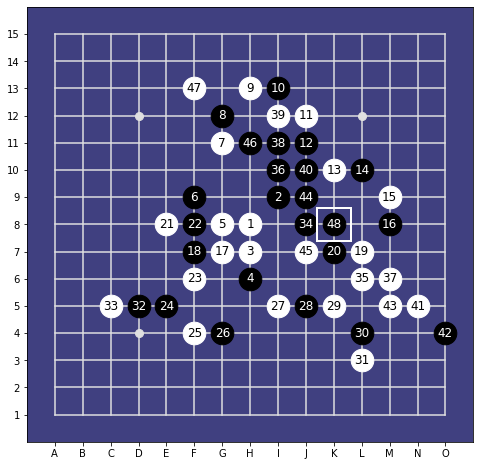

In [154]:
stones = gt.string_to_stones(examine)
board = GomokuBoard(n=15, disp_width=8, stones=stones)
sample = create_nxnx4(SIZE, stones)

for _ in range(50):
    board.set(*move)
    if detect5.detect_five(board).any():
        print('DONE')
        break
    sample = create_nxnx4(SIZE, board.stones)
    #vis(soft_policy(sample))
    move = soft_policy.draw(sample)
    #print(f"Next move: {move}")
board.display()